C:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -243.578
Date:                Tue, 22 Mar 2022   AIC                            507.156
Time:                        17:11:55   BIC                            533.307
Sample:                             0   HQIC                           517.742
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0245      0.100     50.458      0.000       4.829       5.220
ar.L1          0.0677      2.406      0.028      0.978      -4.648       4.783
ar.L2          0.0353      2.409      0.015      0.9

C:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([ 0.00000000e+00, -3.83411082e+00,  3.48023902e+00,  5.66979449e-01,
       -7.02226425e+00, -1.19763995e+00,  3.60758136e+00,  3.75761438e+00,
       -6.30332804e+00,  2.30017595e+00, -2.05400807e+00,  6.03653261e+00,
       -7.05919849e-01,  1.59092253e+00, -7.83699460e+00,  2.55332230e+00,
        2.56809142e+00, -1.15835426e+00,  4.15229609e+00, -4.99721388e+00,
        1.59934431e+00,  4.14967708e+00, -6.75314893e+00, -2.40137187e+00,
        2.49255867e+00,  2.50999983e+00, -2.14927492e+00, -6.43781223e-01,
        1.99021417e-01,  1.13589679e+00, -7.54076004e-01,  6.40528902e+00,
       -1.99287983e-01, -2.70566658e+00,  4.96490264e-03, -1.64458722e-02,
        1.33236823e+00,  1.09904746e+00,  1.52363163e+00, -2.37893908e+00,
       -7.53553409e-01, -6.58279811e+00,  2.28175077e+00, -2.33978974e+00,
        1.23390777e+00,  3.71020459e+00, -3.63170307e+00,  1.51581206e+00,
       -5.02855401e-02,  2.36997916e+00, -4.64334420e+00,  6.87674364e+00,
       -4.67625920e+00, -

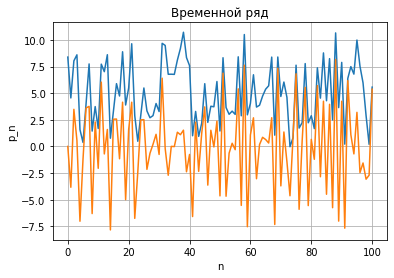

In [2]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from math import sin, exp
from random import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_max = 102

# Задаем ряд
price_ser_src = pd.Series([sin(x) + 10*random() for x in range(1, n_max)])
# p_ser = price_ser_src[::5]

# Находим mu (тренд)
# Простой способ -- первая разность
mu_arr = np.array([price_ser_src[i]-price_ser_src[i-1] if i > 0 else 0. for i in range(len(price_ser_src)) ])

# Находим параметры ARMA (подгоняем модель)
model = ARIMA(price_ser_src, order=(4, 0, 4))
model_fit = model.fit()
print(model_fit.summary())

# make prediction -- это пока вообще не трогаем
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

# График
plt.title("Временной ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(price_ser_src)
plt.plot(mu_arr)

# p_ser.reset_index(inplace=True, drop=True)
# p_ser

mu_arr


[100] [ 0.00000000e+00 -3.83411082e+00  3.48023902e+00  5.66979449e-01
 -7.02226425e+00 -1.19763995e+00  3.60758136e+00  3.75761438e+00
 -6.30332804e+00  2.30017595e+00 -2.05400807e+00  6.03653261e+00
 -7.05919849e-01  1.59092253e+00 -7.83699460e+00  2.55332230e+00
  2.56809142e+00 -1.15835426e+00  4.15229609e+00 -4.99721388e+00
  1.59934431e+00  4.14967708e+00 -6.75314893e+00 -2.40137187e+00
  2.49255867e+00  2.50999983e+00 -2.14927492e+00 -6.43781223e-01
  1.99021417e-01  1.13589679e+00 -7.54076004e-01  6.40528902e+00
 -1.99287983e-01 -2.70566658e+00  4.96490264e-03 -1.64458722e-02
  1.33236823e+00  1.09904746e+00  1.52363163e+00 -2.37893908e+00
 -7.53553409e-01 -6.58279811e+00  2.28175077e+00 -2.33978974e+00
  1.23390777e+00  3.71020459e+00 -3.63170307e+00  1.51581206e+00
 -5.02855401e-02  2.36997916e+00 -4.64334420e+00  6.87674364e+00
 -4.67625920e+00 -6.32396781e-01  2.96925480e-01 -3.06161320e-01
  5.40423458e+00 -5.53538788e+00  7.62630105e+00 -7.53733801e+00
  1.07693089e+00  2

(array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
         -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
         -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
         -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
         -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
         -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
         -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
         -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
         -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
         -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
         -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
         -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
         -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
          0.50505051,   0.70707071,   0.90909091,   1.11111111,
          1.31313131,   1.51515152,   1.71717172,   1.91919192,
          2.12121212,   2.32323232,   2.

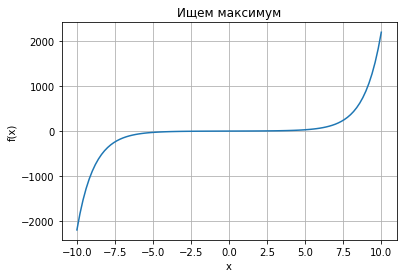

In [3]:
from scipy.optimize import minimize, minimize_scalar
import math
import functools


def math_exp(K: float, inv: float, mu: float, i: int):
    res = -inv/K * (math.exp(K*mu*i) + math.exp(-K*mu*i) - 2) 
    return res

def f(x):
    mu = 1
    t = 1
    return -1/x*(math.exp(x*mu*t) + math.exp(-x*mu*t) - 2)





# Считаем алгоритм

inv_0 = 100
inv_ser = [inv_0]

"""
for cnt, price in enumerate(price_ser_src):
    if cnt == 0:
        continue
    f = functools.partial(math_exp, inv = inv_ser[cnt-1], mu = mu[cnt-1], i=cnt-1)    
    K = minimize_scalar(f, bounds=(-1, 1), method='bounded', ).x
    inv_ser.append(K)
    
inv_ser
"""
print(inv_ser, mu_arr)


x_arr = np.linspace(-10, 10., 100)
f_arr = np.array([f(x_arr[i]) for i in range(len(x_arr))])



# f = functools.partial(math_exp, inv = 10, mu = 1, i=1)    
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("f(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)

x_arr, f_arr









## Данные для расчетов
Модельные данные: ряд ARMA(4, 1)
Реальные данные: 
- боковик USD-RUR 16.02.2022
- растущий тренд USD-RUR 17.02.2022

5.1


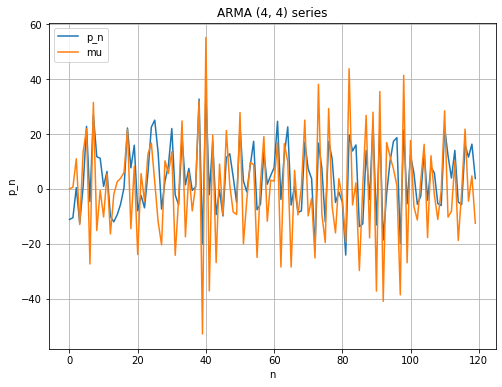

In [4]:
# Генерируем и визуализируем ARMA(4,1)-ряд
import numpy as np
import random
import matplotlib.pyplot as plt

n_max = 120

a = [10., 8., 6., 2., .1]
d = [1., .6, .4, .1, .06]

p = [-1., 3., .1, -.8, .5]
p_const = a[0]*p[4] + a[1]*p[3] + a[2]*p[2] + a[3]*p[1] + a[4]*p[0]
print(p_const)

for i in range(5, n_max+5):
    p_next = a[0]*p[4] + a[1]*p[3] + a[2]*p[2] + a[3]*p[1] + a[4]*p[0] - .1*p[i-1]
    xi = np.random.normal(0., 10., 5)
    p_next += sum([d[i]*xi[i] for i in range(5)])
    p.append(p_next)
    
p_arr_arma = np.array(p[5:])
mu_arr_arma = np.diff(p_arr_arma)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr_arma = np.append(0., mu_arr_arma)

n_lst = list(range(n_max))

figure = plt.figure(figsize=(8, 6))
plt.title("ARMA (4, 4) series") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_arma, mu_arr_arma)
plt.legend(['p_n', 'mu'], loc="upper left")

plt.show()
# p_arr, mu_arr 


np.savetxt('p_arma-4-1.txt', p_arr_arma, fmt='%.18f')
np.savetxt('mu_arma-4-1.txt', mu_arr_arma, fmt='%.18f')



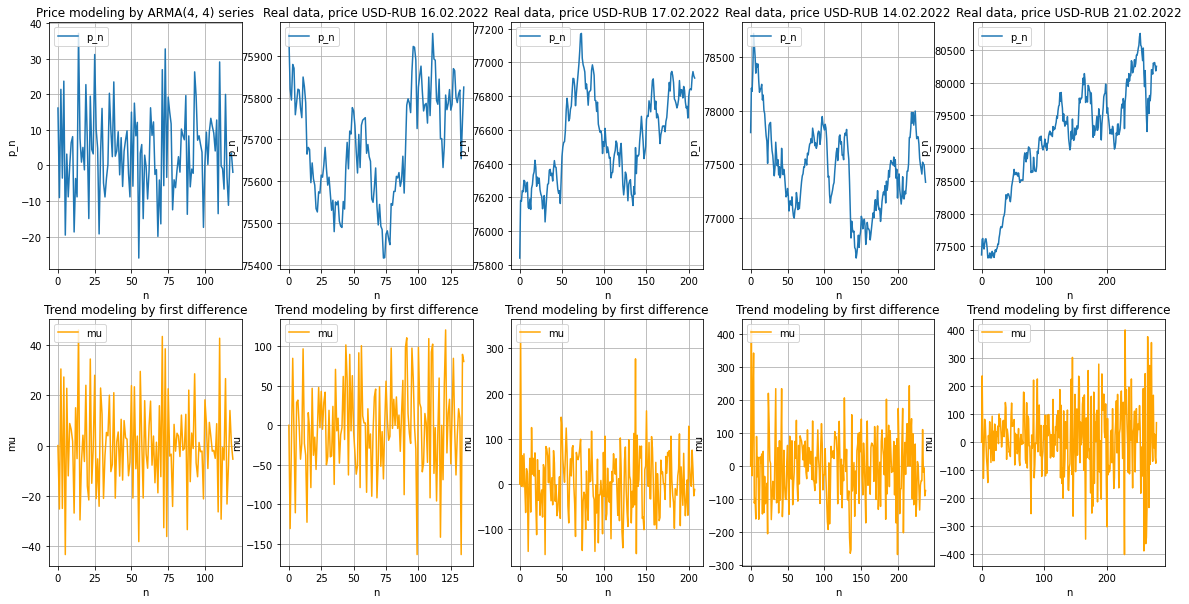

In [6]:
col_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']

df_stable = pd.read_csv('trades-16-02-22.csv', sep=';', names=col_names)
col3_ser_stable = df_stable['col3']
col3_ser_stable.reset_index(drop=True, inplace=True)

df_growth = pd.read_csv('trades-17-02-22.csv', sep=';', names=col_names)
col3_ser_growth = df_growth['col3']
col3_ser_growth.reset_index(drop=True, inplace=True)

df_si_14 = pd.read_csv('trades-si-14-02-22.csv', sep=';', names=col_names)
col3_ser_si_14 = df_si_14['col3']
col3_ser_si_14.reset_index(drop=True, inplace=True)

df_si_21 = pd.read_csv('trades-si-21-02-22.csv', sep=';', names=col_names)
col3_ser_si_21 = df_si_21['col3']
col3_ser_si_21.reset_index(drop=True, inplace=True)


price_series_stable = np.array(col3_ser_stable)
p_arr_stable = np.array([price_series_stable[i] for i in range(len(price_series_stable)) if i % 5000 == 0 ])
p_init_stable = price_series_stable[0]
mu_arr_stable = np.diff(p_arr_stable)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr_stable = np.append(0., mu_arr_stable)

price_series_growth = np.array(col3_ser_growth)
p_arr_growth = np.array([price_series_growth[i] for i in range(len(price_series_growth)) if i % 5000 == 0 ])
p_init_growth = price_series_growth[0]
mu_arr_growth = np.diff(p_arr_growth)
mu_arr_growth = np.append(0., mu_arr_growth)

price_series_si_14 = np.array(col3_ser_si_14)
p_arr_si_14 = np.array([price_series_si_14[i] for i in range(len(price_series_si_14)) if i % 5000 == 0 ])
p_init_si_14 = price_series_si_14[0]
mu_arr_si_14 = np.diff(p_arr_si_14)
mu_arr_si_14 = np.append(0., mu_arr_si_14)

price_series_si_21 = np.array(col3_ser_si_21)
p_arr_si_21 = np.array([price_series_si_21[i] for i in range(len(price_series_si_21)) if i % 5000 == 0 ])
p_init_si_21 = price_series_si_21[0]
mu_arr_si_21 = np.diff(p_arr_si_21)
mu_arr_si_21 = np.append(0., mu_arr_si_21)


fig = plt.figure(figsize=(20, 10))
n_lst = list(range(len(p_arr_arma)))
plt.subplot(2, 5, 1)
plt.title("Price modeling by ARMA(4, 4) series") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_arma)
plt.legend(['p_n'], loc="upper left")

plt.subplot(2, 5, 6)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_arma, color='orange')
plt.legend(['mu'], loc="upper left")


n_lst = list(range(len(p_arr_stable)))
plt.subplot(2, 5, 2)
plt.title("Real data, price USD-RUB 16.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_stable)
plt.legend(['p_n'], loc="upper left")

plt.subplot(2, 5, 7)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_stable, color='orange')
plt.legend(['mu'], loc="upper left")

n_lst = list(range(len(p_arr_growth)))
plt.subplot(2, 5, 3)
plt.title("Real data, price USD-RUB 17.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_growth)
plt.legend(['p_n'], loc="upper left")

plt.subplot(2, 5, 8)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_growth, color='orange')
plt.legend(['mu'], loc="upper left")

n_lst = list(range(len(p_arr_si_14)))
plt.subplot(2, 5, 4)
plt.title("Real data, price USD-RUB 14.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_si_14)
plt.legend(['p_n'], loc="upper left")

plt.subplot(2, 5, 9)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_si_14, color='orange')
plt.legend(['mu'], loc="upper left")

n_lst = list(range(len(p_arr_si_21)))
plt.subplot(255)
plt.title("Real data, price USD-RUB 21.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_si_21)
plt.legend(['p_n'], loc="upper left")

plt.subplot(2, 5, 10)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_si_21, color='orange')
plt.legend(['mu'], loc="upper left")




fig.subplots_adjust(hspace=.2)

plt.show()




# p_init = p_init_si_14
# p_arr = p_arr_si_14
# mu_arr = mu_arr_si_14




#p_init, p_arr, mu_arr 


## Alg0 v.0.1 

Работает в двух модификациях: 

1) без добавления шума, когда g(t) = E_g(t), т.е. функция выигрыша равна своему матожиданию. В этом случае для положительных I_0, K всегда положительно или равно 0, и это чисто бычья стратегия. Для отрицательных I_0 K всегда отрицательно или равно 0, и это чисто медвежья стратегия. Т.е. нет смены знака по ходу выполнения алгоритма, каким бы ни был входной тренд.

2) к матожиданию процесса при вычислении функции g(t) мы добавляем нормальный белый шум N(0, 10). В этом случае появляется знакопеременность у K, и стратегия становится смешанной.


Real data USD 16.02.2022:


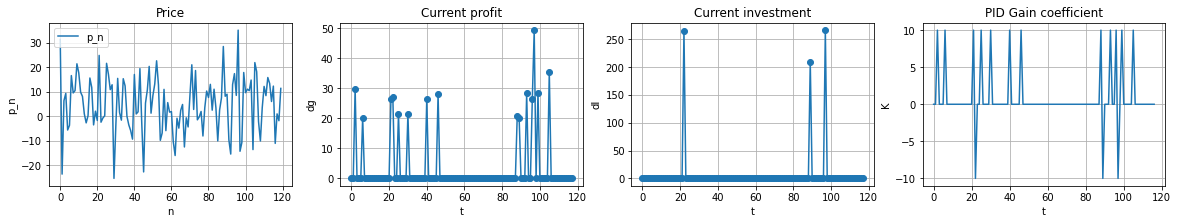

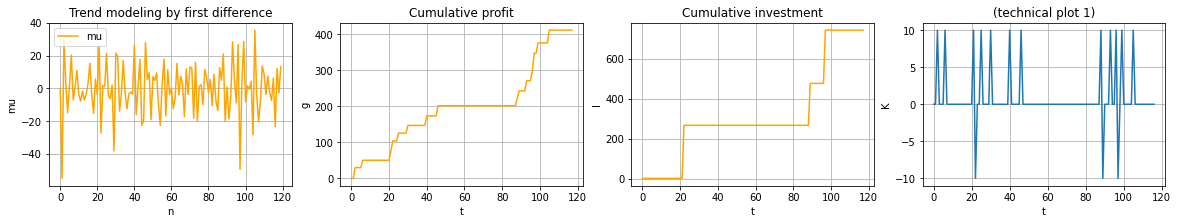

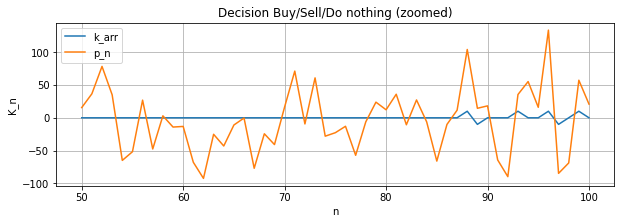

In [20]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


def minus_eg(k, _d_inv, _mu, _delta_t):
    """Функция Eg, которую мы максимизируем, взятая со знаком минус, потому что scipy.optimize ищет минимум."""
    res = -_mu/fabs(_mu)*_d_inv/k*(exp(k*_mu*_delta_t) + exp(-k*_mu*_delta_t) - 2.)
    return res


def calc_alg0(_p_arr, _mu_arr, di0):
    n_max = len(_p_arr) - 1
    # Ограничения на K
    k_min = -10
    k_max = 10
    # Массивы
    t_max = float(n_max) # /100
    t_arr = np.linspace(0., t_max, n_max + 1)
    #dt = t_arr[1]-t_arr[0]
    dt = 1
    k_arr = np.zeros(n_max+1)
    dg_arr = np.zeros(n_max+1)
    di_arr = np.zeros(n_max+1)
    di_arr[0] = di0    
    # print('Starting alg0, I_0 = ', di0)    
    for i in range(1, n_max-1):
        des_str = ''
        if fabs(_mu_arr[i]) <= .1:
            k_arr[i] = 0.
            dg_arr[i] = 0.
            des_str = 'Nothing'
            di_arr[i+1] = 0. 
        else:            
            mu_normalized = _mu_arr[i]/10
            minus_eg_cur = functools.partial(minus_eg, _d_inv=di_arr[i], _mu = mu_normalized, _delta_t=dt)
            """k_line = np.linspace(k_min, k_max, 100)
            f = np.array([minus_eg_cur(k)for k in k_line])
            plt.plot(k_line, f)
            plt.show()"""
            k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
            k_arr[i] = k_cur
            dg_arr[i] = k_cur/fabs(k_cur)*(_p_arr[i] - _p_arr[i-1])
            
            if dg_arr[i] < 20:
                k_arr[i] = 0.
                dg_arr[i] = 0.
                di_arr[i] = 0.
                des_str = 'Nothing'
            else: 
                if k_cur >= 0:
                    des_str = 'Buy'
                else:
                    des_str = 'Sell'    
            di_arr[i+1] = di_arr[i] + k_arr[i]*dg_arr[i]
            if i <= 10:
                # print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(di_arr[i], 4)}, mu={round(mu_normalized, 4)}',
                #      f'g={round(dg_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}')    
                pass
    dk_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
    dg_ser = pd.Series(dg_arr[:-2], index=t_arr[:-2])
    di_ser = pd.Series(di_arr[:-2], index=t_arr[:-2])
    # print(di_arr)
    plt.figure(figsize=(20, 3))
    
    n_lst = list(range(len(_p_arr)))
    plt.subplot(141)
    plt.title("Price") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("p_n") # ось ординат
    plt.grid()      # включение отображение сетки
    # plt.plot(p_ser)  # построение графика
    plt.plot(n_lst, _p_arr)
    plt.legend(['p_n'], loc="upper left")
    plt.subplot(142)
    plt.plot(dg_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("dg")
    plt.title("Current profit")
    plt.grid()     
    plt.subplot(143)
    plt.plot(di_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("dI")
    plt.title("Current investment")
    plt.grid()     
    plt.subplot(144)
    plt.plot(k_arr[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("PID Gain coefficient")
    plt.grid()
    plt.show()        
    
    plt.figure(figsize=(20, 3))
    # plt.tight_layout()
    plt.subplot(141)
    plt.title("Trend modeling by first difference") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("mu") # ось ординат
    plt.grid()      # включение отображение сетки
    plt.plot(n_lst, _mu_arr, color='orange')
    plt.legend(['mu'], loc="upper left")
    plt.subplot(142)
    plt.plot(np.cumsum(dg_ser[:n_max-2]), color='orange')
    plt.xlabel("t")
    plt.ylabel("g")
    plt.title("Cumulative profit")
    plt.grid()     
    plt.subplot(143)
    plt.plot(np.cumsum(di_ser[:n_max-2]), color='orange')
    plt.xlabel("t")
    plt.ylabel("I")
    plt.title("Cumulative investment")
    plt.grid()     
    plt.subplot(144)
    plt.plot(k_arr[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("(technical plot 1)")
    plt.grid()
    # plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()    
    
    figure = plt.figure(figsize=(10, 3))
    plt.title("Decision Buy/Sell/Do nothing (zoomed)") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("K_n") # ось ординат
    plt.grid()      # включение отображение сетки
    # plt.plot(p_ser)  # построение графика
    plt.plot(n_lst[50:101], k_arr[50:101])
    plt.plot(n_lst[50:101], (_p_arr[50:101]-_p_arr.mean())/_p_arr.std()*50)
    plt.legend(['k_arr','p_n'], loc="upper left")
    
#    print(list(dg_ser))
#    print(list(np.cumsum(dg_ser)))
    
    

"""
# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0
print('1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0:')
calc_alg0(p_arr, mu_arr, 10)
print('='*10)
print()
print()

# 2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0
print('2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0:')
calc_alg0(p_arr, mu_arr, -10)
print('='*10)
print()
print()

# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise = 10, lambda: .1*np.random.normal(0, 1)    
print('3. I_0=10, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise -- белый шум 0.1*N(0,1):')
xi_noise = lambda: .1*np.random.normal(0, 1)  
calc_alg0(p_arr, mu_arr, 10, xi_noise)    
print('='*10)
print()
print()
"""

# di0 = 1
# xi_noise = lambda: -10.*np.random.normal(0, 20)  
# calc_alg0(p_arr_si_21[:200], mu_arr_si_21[:200], 1)
print('Real data USD 16.02.2022:')
calc_alg0(p_arr_arma, mu_arr_arma, 1)
# p_arr_stable


In [9]:
print('Real data USD 17.02.2022:')
calc_alg0(p_arr_growth, mu_arr_growth, 1)


Real data USD 17.02.2022:


IndexError: index 101 is out of bounds for axis 0 with size 101

In [10]:
print('Real data USD 14.02.2022:')
calc_alg0(p_arr_si_14, mu_arr_si_14, 1)

Real data USD 14.02.2022:


IndexError: index 101 is out of bounds for axis 0 with size 101

In [16]:
print('Real data USD 21.02.2022:')

calc_alg0(p_arr_si_21[:200], mu_arr_si_21[:200], 1)

Real data USD 21.02.2022:


IndexError: index 101 is out of bounds for axis 0 with size 101

In [17]:
mu_arr


array([ 0.        ,  0.03095793,  2.50844352, -4.81308732, -1.96300962,
        5.48913116, -5.79723521,  4.29451599,  5.01936814, -4.29197341,
        2.68887264, -5.5939089 , -0.11416015,  6.11896882, -2.76097145,
       -6.16521296,  8.3734904 , -3.06864322,  4.74199812, -7.50157777,
        5.97892345, -2.66525697, -1.19256346, -3.34523362,  6.7797146 ,
        0.89503466, -0.95607312, -4.25106082, -3.61241913,  7.06212333,
        0.64210151, -2.04970131, -2.05376084,  1.39291497,  2.11018231,
       -3.35424348, -2.79683487,  7.52852724, -3.90439901,  1.77051453,
       -5.11368323,  6.33181109,  0.57972159, -1.15051842,  0.14067607,
       -6.1358846 ,  1.69140546,  2.43606178,  2.43788641, -1.85118113,
        4.49246088, -6.63233443, -0.25621455, -0.27066691, -0.20908865,
        4.83227059, -6.19183905,  1.5766157 , -1.40957478,  6.45860116,
        0.47560611, -8.84678723,  4.83899632,  2.16036634,  1.44155102,
       -8.05068847,  2.01557366, -1.74465627,  7.64029379, -3.13

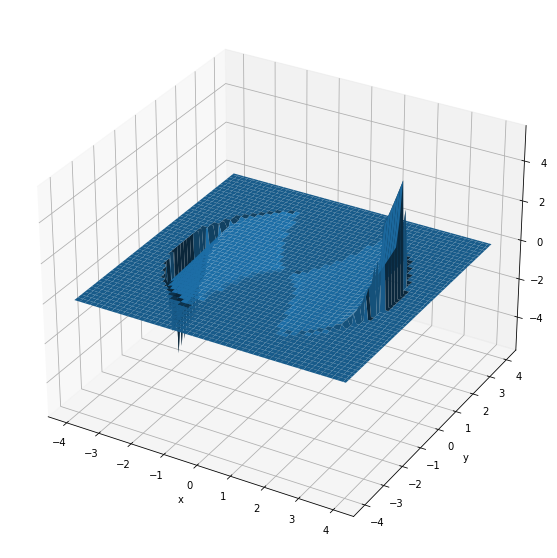

C:\Python310\lib\site-packages\scipy\optimize\_minimize.py:564: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


iter=1 t=1.0 mu=34.1 k_cur_arr=[ 3.16212897 -0.00772444] Kp=3.16213 Ki=0.0 I=1.0 g=341.0 -> Buy
iter=2 t=2.0 mu=-0.5 k_cur_arr=[-2.1  1. ] Kp=-2.1 Ki=0.0 I=1079.28598 g=5.0 -> Sell
iter=3 t=3.0 mu=6.3 k_cur_arr=[3.16227372 0.00844754] Kp=3.16227 Ki=0.0 I=1068.78598 g=63.0 -> Buy
iter=4 t=4.0 mu=-0.6 k_cur_arr=[-2.1  1. ] Kp=-2.1 Ki=0.0 I=1268.00922 g=6.0 -> Sell
iter=5 t=5.0 mu=6.7 k_cur_arr=[3.16213085 0.00848486] Kp=3.16213 Ki=0.0 I=1255.40922 g=67.0 -> Buy
iter=6 t=6.0 mu=-0.6 k_cur_arr=[-2.1  1. ] Kp=-2.1 Ki=0.0 I=1467.27199 g=6.0 -> Sell
iter=7 t=7.0 mu=-6.3 k_cur_arr=[-0.65620094  1.23123527] Kp=-0.6562 Ki=0.0 I=1454.67199 g=63.0 -> Sell
iter=8 t=8.0 mu=3.4 k_cur_arr=[3.16221276 0.00874658] Kp=3.16221 Ki=0.0 I=1413.33133 g=34.0 -> Buy
iter=9 t=9.0 mu=2.4 k_cur_arr=[3.1623405  0.00569377] Kp=3.16234 Ki=0.0 I=1520.84657 g=24.0 -> Buy
iter=10 t=10.0 mu=-14.9 k_cur_arr=[-0.10742655  1.27872666] Kp=-0.10743 Ki=0.0 I=1596.74274 g=149.0 -> Sell


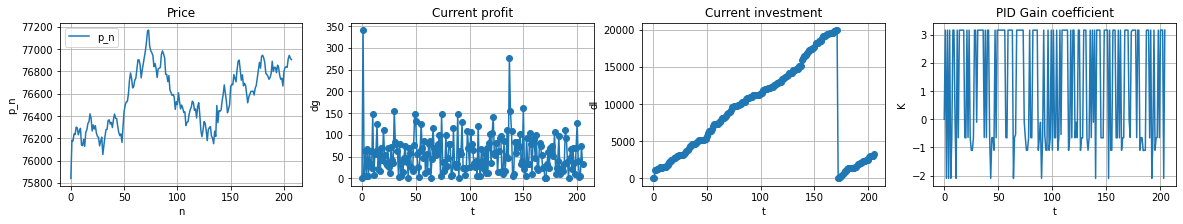

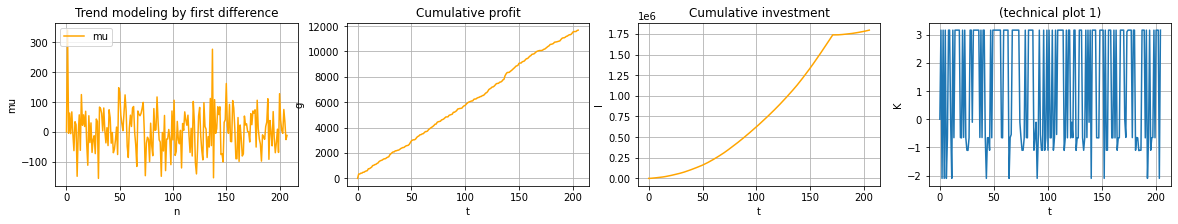

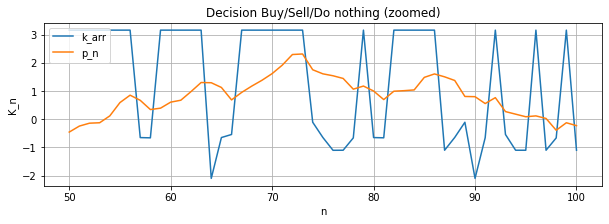

In [79]:
import math
import scipy
from scipy.optimize import minimize

def minus_eg_pi(k_vect, di=1, mu=-1, dt=1):
    k_p = k_vect[0]
    k_i = k_vect[1]
    """Функция Eg, которую мы максимизируем, взятая со знаком минус, потому что scipy.optimize ищет минимум."""
    if mu*mu*k_p*k_p + 4.*mu*k_i < 0:
        return 0.
    if mu*mu*k_p*k_p - 4.*mu*k_i < 0:
        return 0.
    if k_p*k_p + k_i*k_i > 10:
        return 0.
    alpha = math.sqrt(mu*mu*k_p*k_p + 4.*mu*k_i) / 2. 
    beta = math.sqrt(mu*mu*k_p*k_p - 4.*mu*k_i) / 2.
    comp1, comp2 = 0., 0.
    if alpha != 0.:
        comp1 = exp(mu*k_p*dt)*math.sinh(alpha*dt)/alpha
    else:
        comp1 = 1.
    if beta != 0.:
        comp2 = math.sinh(beta*dt)/beta
    else:
        comp2 = 1.    
    
    res = - mu*di*exp(-mu*k_p*dt/2.) * (comp1 - comp2)
    return res
       
    
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

_x = np.linspace(-4., 4., 100)
_y = np.linspace(-4., 4., 100)

x, y = np.meshgrid(_x, _y)

plt.xlabel('x')
plt.ylabel('y')

# print(x, y)
# mu=6.1 k_cur_arr=[0. 0.] Kp=0.0 Ki=0.0 I=-84.74089 
z = np.array([[minus_eg_pi((_x[i], _y[j]), di=-84.74089, mu=6.1, dt=1.) for i in range(100)] for j in range(100)])
ax.plot_surface(x, y, z)
plt.show()    
    


"""
def ineq_constraint1(k_p, k_i, mu=1):
    return mu*mu*k_p*k_p - 4.*mu*k_i

def ineq_constraint2(k_p, k_i, mu=1):
    return mu*mu*k_p*k_p + 4.*mu*k_i

def ineq_constraint3(k_p, k_i):
    return k_p*k_p + k_i*k+i - 10.
"""

"""
# def ineq_cons(k_p, k_i, mu=1):
#    return [mu*mu*k_p*k_p - 4.*mu*k_i, mu*mu*k_p*k_p + 4.*mu*k_i, k_p*k_p + k_i*k+i - 10.]

def ineq_cons(k_p, k_i):
    k_p*k_p + k_i*k+i - 10.

# con = scipy.optimize.NonlinearConstraint(ineq_cons, -4., 4.)
b = (-4., 4.)
minus_eg_pi_cur = functools.partial(minus_eg_pi, di = 1., mu = -4.13, dt = 1.)
print(minimize(minus_eg_pi_cur, x0=[0., 0.], method='COBYLA', bounds=b).x)
"""    
    

def calc_alg1(_p_arr, _mu_arr, di0):
    n_max = len(_p_arr) - 1
    # Ограничения на K
    k_min = -4.
    k_max = 4.
    # Массивы
    t_max = float(n_max) # /100
    t_arr = np.linspace(0., t_max, n_max + 1)
    #dt = t_arr[1]-t_arr[0]
    dt = 1
    k_p_arr = np.zeros(n_max+1)
    k_i_arr = np.zeros(n_max+1)
    dg_arr = np.zeros(n_max+1)
    di_arr = np.zeros(n_max+1)
    di_arr[0] = di0    
    di_arr[1] = di0   
    # print('Starting alg0, I_0 = ', di0)    
    for i in range(1, n_max-1):
        des_str = ''
        if fabs(_mu_arr[i]) <= .1:
            k_p_arr[i] = 0.
            k_i_arr[i] = 0.
            dg_arr[i] = 0.
            des_str = 'Nothing'
            di_arr[i+1] = 0. 
        else:            
            mu_normalized = _mu_arr[i]/10.
            b = (k_min, k_max)
            sign_mu = mu_normalized/fabs(mu_normalized)
            minus_eg_pi_cur = functools.partial(minus_eg_pi, di = di_arr[i-1], mu = mu_normalized, dt = 1.)
            k_cur_arr = minimize(minus_eg_pi_cur, x0=[sign_mu*3.1, 0.], method='COBYLA', bounds=b).x
            # print(k_cur_tpl)
            k_p_arr[i], k_i_arr[i] = k_cur_arr[0], k_cur_arr[1]
            dg_arr[i] = k_p_arr[i]/fabs(k_p_arr[i])*(_p_arr[i] - _p_arr[i-1])
            integ = 0.
            if i <= 10:
                k_i_arr[i] = 0.
                if k_p_arr[i] >= 0.:
                    des_str = 'Buy'
                else:
                    des_str = 'Sell'           
            else:
                integ = 0
                for cnt in range(10):
                    integ += dg_arr[i-cnt]*exp(-3.14159*cnt*dt)   
                # Decision
                if k_p_arr[i]*k_i_arr[i] >= 0 and k_cur_arr[1] >= 0:
                    des_str = 'Buy'
                elif k_cur_arr[0] < 0 and k_cur_arr[1] < 0:
                    des_str = 'Sell'
                else:
                    des_str = 'Nothing'   
            # Если прибыль падает близко к 0, уходим    
            # if dg_arr[i] < 20.:
            #    k_p_arr[i] = 0.
            #    k_i_arr[i] = 0.
            #    dg_arr[i] = 0.
            #    di_arr[i] = 0.
            #    des_str = 'Nothing'
            # else:            
            di_arr[i+1] = di_arr[i] + k_p_arr[i]*dg_arr[i] + k_i_arr[i]*integ
            if i <= 10:
                print(f'iter={i} t={round(t_arr[i], 2)} mu={round(mu_normalized, 5)} k_cur_arr={k_cur_arr}', 
                    f'Kp={round(k_p_arr[i], 5)} Ki={round(k_i_arr[i], 5)} I={round(di_arr[i], 5)}', 
                    f'g={round(dg_arr[i], 5)} -> {des_str}')   
                    # pass
    dkp_ser = pd.Series(k_p_arr[:-2], index=t_arr[:-2])
    dki_ser = pd.Series(k_i_arr[:-2], index=t_arr[:-2])
    dg_ser = pd.Series(dg_arr[:-2], index=t_arr[:-2])
    di_ser = pd.Series(di_arr[:-2], index=t_arr[:-2])
    # print(di_arr)
    plt.figure(figsize=(20, 3))
    
    n_lst = list(range(len(_p_arr)))
    plt.subplot(141)
    plt.title("Price") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("p_n") # ось ординат
    plt.grid()      # включение отображение сетки
    # plt.plot(p_ser)  # построение графика
    plt.plot(n_lst, _p_arr)
    plt.legend(['p_n'], loc="upper left")
    plt.subplot(142)
    plt.plot(dg_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("dg")
    plt.title("Current profit")
    plt.grid()     
    plt.subplot(143)
    plt.plot(di_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("dI")
    plt.title("Current investment")
    plt.grid()     
    plt.subplot(144)
    plt.plot(k_p_arr[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("PID Gain coefficient")
    plt.grid()
    plt.show()        
    
    plt.figure(figsize=(20, 3))
    # plt.tight_layout()
    plt.subplot(141)
    plt.title("Trend modeling by first difference") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("mu") # ось ординат
    plt.grid()      # включение отображение сетки
    plt.plot(n_lst, _mu_arr, color='orange')
    plt.legend(['mu'], loc="upper left")
    plt.subplot(142)
    plt.plot(np.cumsum(dg_ser[:n_max-2]), color='orange')
    plt.xlabel("t")
    plt.ylabel("g")
    plt.title("Cumulative profit")
    plt.grid()     
    plt.subplot(143)
    plt.plot(np.cumsum(di_ser[:n_max-2]), color='orange')
    plt.xlabel("t")
    plt.ylabel("I")
    plt.title("Cumulative investment")
    plt.grid()     
    plt.subplot(144)
    plt.plot(k_p_arr[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("(technical plot 1)")
    plt.grid()
    # plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()    
    
    figure = plt.figure(figsize=(10, 3))
    plt.title("Decision Buy/Sell/Do nothing (zoomed)") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("K_n") # ось ординат
    plt.grid()      # включение отображение сетки
    # plt.plot(p_ser)  # построение графика
    plt.plot(n_lst[50:101], k_p_arr[50:101])
    plt.plot(n_lst[50:101], (_p_arr[50:101]-_p_arr.mean())/_p_arr.std())
    plt.legend(['k_arr','p_n'], loc="upper left")
    
calc_alg1(p_arr_growth, mu_arr_growth, 1.)    


C:\Python310\lib\site-packages\scipy\optimize\_minimize.py:564: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


iter=1 t=1.0 mu=-13.1 k_cur_arr=[-0.54173254  1.02893973] Kp=-0.54173 Ki=0.0 I=1.0 g=131.0 -> Sell
iter=2 t=2.0 mu=-2.6 k_cur_arr=[-1.10057064  1.03377802] Kp=-1.10057 Ki=0.0 I=-69.96696 g=26.0 -> Sell
iter=3 t=3.0 mu=8.5 k_cur_arr=[4.1 0. ] Kp=4.1 Ki=0.0 I=-98.5818 g=85.0 -> Buy
iter=4 t=4.0 mu=-0.9 k_cur_arr=[-3.16201178 -0.02912489] Kp=-3.16201 Ki=0.0 I=249.9182 g=9.0 -> Sell
iter=5 t=5.0 mu=-11.1 k_cur_arr=[-0.66346781  1.24381047] Kp=-0.66347 Ki=0.0 I=221.46009 g=111.0 -> Sell
iter=6 t=6.0 mu=2.9 k_cur_arr=[ 3.1623495  -0.00493909] Kp=3.16235 Ki=0.0 I=147.81517 g=29.0 -> Buy
iter=7 t=7.0 mu=3.2 k_cur_arr=[3.16137983 0.06745423] Kp=3.16138 Ki=0.0 I=239.5233 g=32.0 -> Buy
iter=8 t=8.0 mu=-0.2 k_cur_arr=[-2.1  1. ] Kp=-2.1 Ki=0.0 I=340.68746 g=2.0 -> Sell
iter=9 t=9.0 mu=-4.3 k_cur_arr=[-0.64973111  1.22389143] Kp=-0.64973 Ki=0.0 I=336.48746 g=43.0 -> Sell
iter=10 t=10.0 mu=-2.3 k_cur_arr=[-1.10101598  1.04506571] Kp=-1.10102 Ki=0.0 I=308.54902 g=23.0 -> Sell


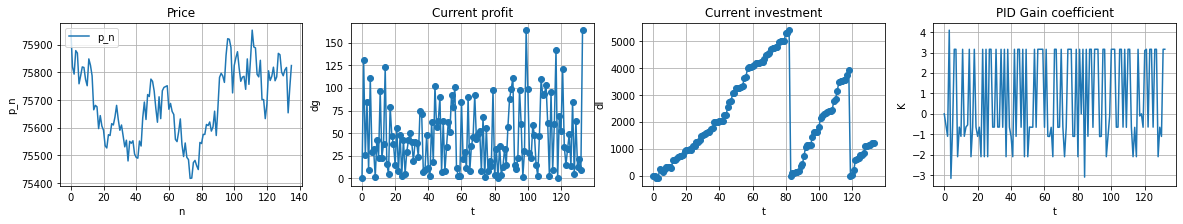

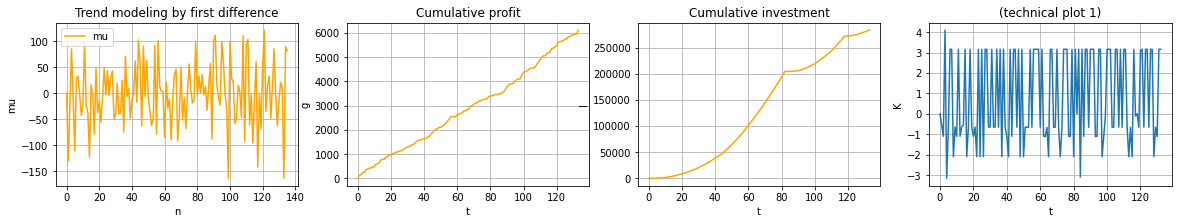

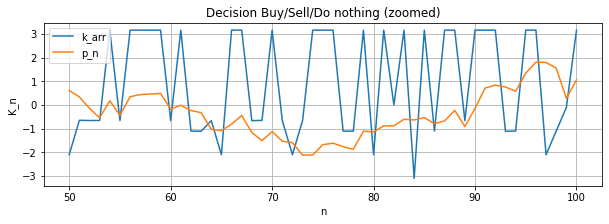

In [73]:
calc_alg1(p_arr_stable, mu_arr_stable, 1.)    

C:\Python310\lib\site-packages\scipy\optimize\_minimize.py:564: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


iter=1 t=1.0 mu=41.3 k_cur_arr=[3.16216724 0.00539148] Kp=3.16217 Ki=0.0 I=1.0 g=413.0 -> Buy
iter=2 t=2.0 mu=-2.9 k_cur_arr=[-1.10032053  1.02531725] Kp=-1.10032 Ki=0.0 I=1306.97507 g=29.0 -> Sell
iter=3 t=3.0 mu=19.6 k_cur_arr=[3.16232268 0.01575938] Kp=3.16232 Ki=0.0 I=1275.06577 g=196.0 -> Buy
iter=4 t=4.0 mu=34.3 k_cur_arr=[ 3.16216626 -0.00758639] Kp=3.16217 Ki=0.0 I=1894.88102 g=343.0 -> Buy
iter=5 t=5.0 mu=-11.2 k_cur_arr=[-0.66355523  1.24396618] Kp=-0.66356 Ki=0.0 I=2979.50405 g=112.0 -> Sell
iter=6 t=6.0 mu=-9.8 k_cur_arr=[-0.6621695   1.24149225] Kp=-0.66217 Ki=0.0 I=2905.18586 g=98.0 -> Sell
iter=7 t=7.0 mu=-16.0 k_cur_arr=[-0.10812641  1.28095919] Kp=-0.10813 Ki=0.0 I=2840.29325 g=160.0 -> Sell
iter=8 t=8.0 mu=9.0 k_cur_arr=[3.16232114 0.00934343] Kp=3.16232 Ki=0.0 I=2822.99303 g=90.0 -> Buy
iter=9 t=9.0 mu=-3.2 k_cur_arr=[-1.10017992  1.01896863] Kp=-1.10018 Ki=0.0 I=3107.60193 g=32.0 -> Sell
iter=10 t=10.0 mu=2.7 k_cur_arr=[3.16159661 0.06862254] Kp=3.1616 Ki=0.0 I=3072

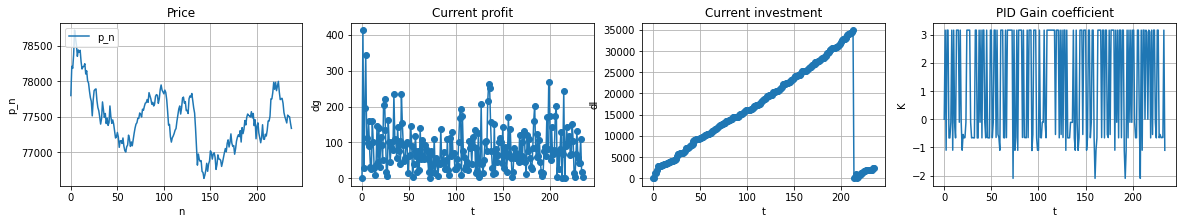

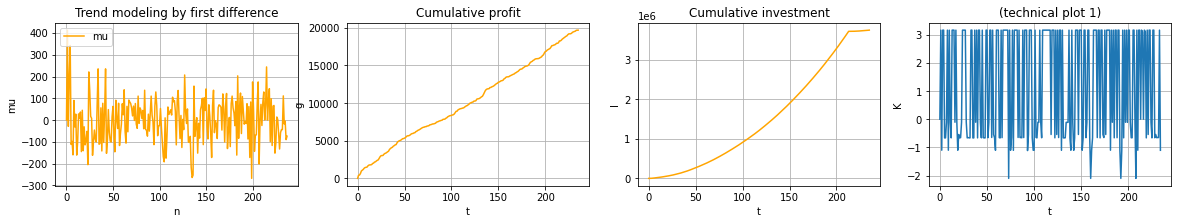

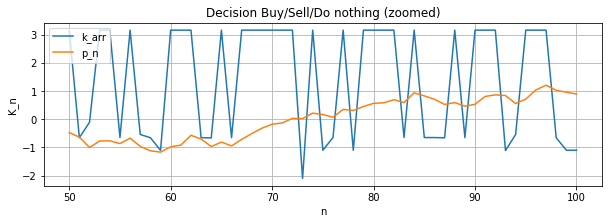

In [75]:
calc_alg1(p_arr_si_14, mu_arr_si_14, 1.) 

C:\Python310\lib\site-packages\scipy\optimize\_minimize.py:564: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


iter=1 t=1.0 mu=23.7 k_cur_arr=[ 3.16226647 -0.0170508 ] Kp=3.16227 Ki=0.0 I=1.0 g=237.0 -> Buy
iter=2 t=2.0 mu=1.4 k_cur_arr=[3.16187423 0.04125712] Kp=3.16187 Ki=0.0 I=750.45715 g=14.0 -> Buy
iter=3 t=3.0 mu=-12.9 k_cur_arr=[-0.54171754  1.02864904] Kp=-0.54172 Ki=0.0 I=794.72339 g=129.0 -> Sell
iter=4 t=4.0 mu=-3.2 k_cur_arr=[-1.10017992  1.01896863] Kp=-1.10018 Ki=0.0 I=724.84183 g=32.0 -> Sell
iter=5 t=5.0 mu=8.2 k_cur_arr=[ 3.16231089 -0.00803526] Kp=3.16231 Ki=0.0 I=689.63607 g=82.0 -> Buy
iter=6 t=6.0 mu=6.7 k_cur_arr=[3.16212657 0.01167931] Kp=3.16213 Ki=0.0 I=948.94557 g=67.0 -> Buy
iter=7 t=7.0 mu=0.8 k_cur_arr=[3.16212568 0.01441691] Kp=3.16213 Ki=0.0 I=1160.80805 g=8.0 -> Buy
iter=8 t=8.0 mu=-5.8 k_cur_arr=[-0.65486383  1.22922619] Kp=-0.65486 Ki=0.0 I=1186.10505 g=58.0 -> Sell
iter=9 t=9.0 mu=-9.0 k_cur_arr=[-0.66118702  1.2397374 ] Kp=-0.66119 Ki=0.0 I=1148.12295 g=90.0 -> Sell
iter=10 t=10.0 mu=-14.4 k_cur_arr=[-0.10705846  1.27756745] Kp=-0.10706 Ki=0.0 I=1088.61612 g=

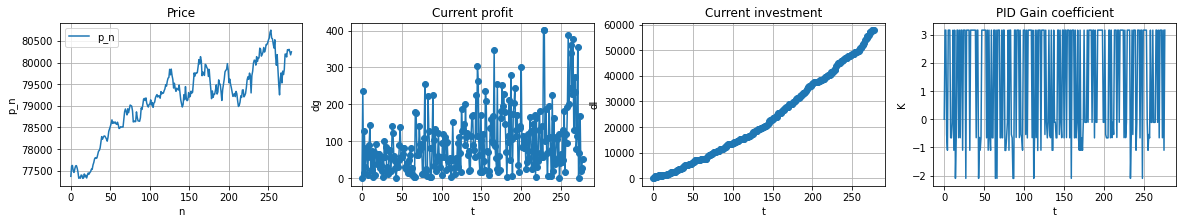

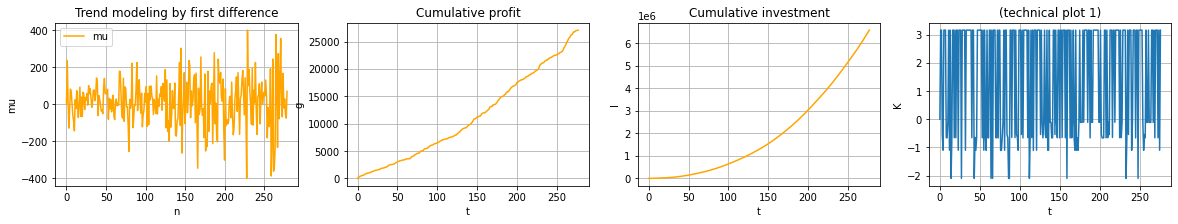

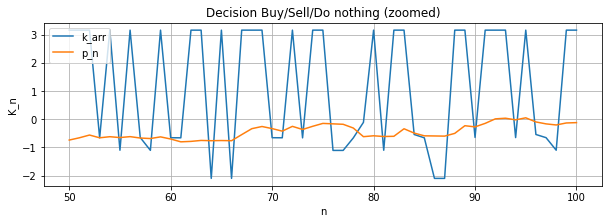

In [76]:
calc_alg1(p_arr_si_21, mu_arr_si_21, 1.) 

C:\Python310\lib\site-packages\scipy\optimize\_minimize.py:564: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


iter=1 t=1.0 mu=-1.00822 k_cur_arr=[-1.11271491  1.15895958] Kp=-1.11271 Ki=0.0 I=1.0 g=10.08224 -> Sell
iter=3 t=3.0 mu=-0.91165 k_cur_arr=[-3.16202445 -0.04524447] Kp=-3.16202 Ki=0.0 I=0.0 g=9.11647 -> Sell
iter=4 t=4.0 mu=3.62523 k_cur_arr=[3.1 0. ] Kp=3.1 Ki=0.0 I=-28.82649 g=36.25226 -> Buy
iter=5 t=5.0 mu=-2.09764 k_cur_arr=[-3.15274181  0.24427813] Kp=-3.15274 Ki=0.0 I=83.5555 g=20.97642 -> Sell
iter=6 t=6.0 mu=-0.96269 k_cur_arr=[-1.11391561  1.16624554] Kp=-1.11392 Ki=0.0 I=17.42227 g=9.62691 -> Sell
iter=7 t=7.0 mu=3.38012 k_cur_arr=[3.16221255 0.00875682] Kp=3.16221 Ki=0.0 I=6.69871 g=33.80117 -> Buy
iter=8 t=8.0 mu=-4.15104 k_cur_arr=[-0.64912076  1.2236257 ] Kp=-0.64912 Ki=0.0 I=113.5852 g=41.51043 -> Sell
iter=9 t=9.0 mu=3.02499 k_cur_arr=[3.16235388 0.0089078 ] Kp=3.16235 Ki=0.0 I=86.63991 g=30.24989 -> Buy
iter=10 t=10.0 mu=-1.67548 k_cur_arr=[-1.10340082  1.08240196] Kp=-1.1034 Ki=0.0 I=182.30076 g=16.75482 -> Sell


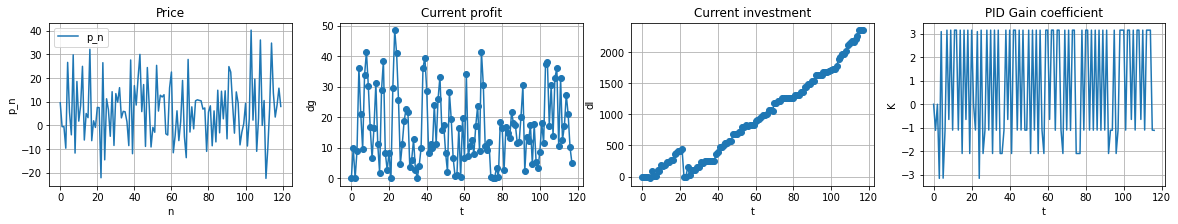

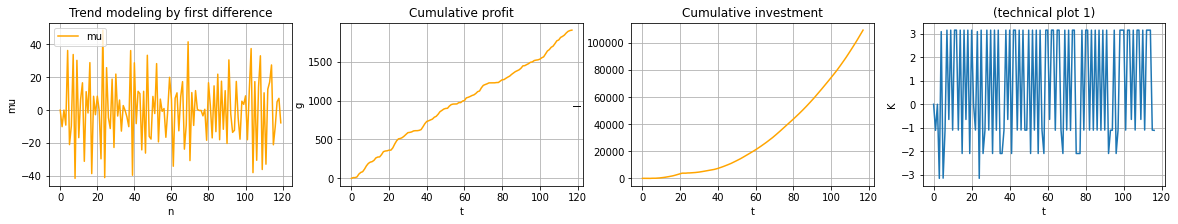

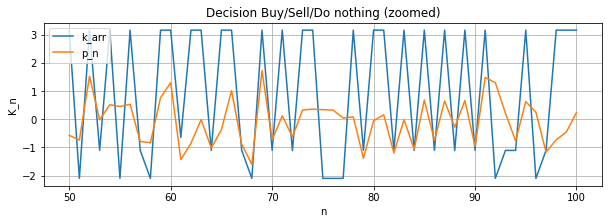

In [77]:
calc_alg1(p_arr_arma, mu_arr_arma, 1.) 